In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# Этап сбора данных

In [8]:
# Определим список директорий, в котором лежат все наши папки с данными
# Примечание для тех, кто будет брать этот проект с гитхаба:
# Я тянул данные с закрытого сервера, если захотите протестировать - нужно распаковать архив в проекте и переписать path
# Если положите всю структуру из архива в корневую папку проекта (т.е. папка data будет в одной папке с блокнотом), 
# то path = 'data'
path = '../shared/homeworks/python_ds_miniprojects/4/data'
dirs = os.listdir(path)
dirs

['2020-12-05',
 '2020-12-08',
 '2020-12-09',
 '2020-12-04',
 '2020-12-06',
 '2020-12-03',
 '2020-12-07']

In [9]:
# Функция для чтения и сбора всех датафреймов в один список
def get_datasets(dates):
    data_frames = []
    for date in dates: # проходим по каждой папке с датами
        if not(date.startswith('.')): # если есть системные файлы - отбрасываем
            path_dt = f'{path}/{date}' # сохраняем путь к папке с датой
            names = os.listdir(path_dt) # сохраняем список папок с именами в текущей папке с датой
            for name in names: # проходим по каждой папке с именем
                if not(name.startswith('.')):
                    df = pd.read_csv(f'{path_dt}/{name}/data.csv')[['product_id', 'quantity']] # читаем data.csv и отбираем нужные нам столбцы
                    df[['name', 'date']] = name, date # добавляем столбцы с именем и датой
                    data_frames.append(df) # добавляем в общий список датафреймов
    return data_frames # возвращаем полученный список с датафреймами

In [10]:
full_data = pd.concat(get_datasets(dirs)) # применяем функцию получения всех датафреймов и собираем в итоговый датасет
full_data.head()

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05


In [11]:
# выясним кто из пользователей купил больше всего товаров
top_client = full_data.groupby('name', as_index=False) \
    .agg({'quantity': 'sum'}) \
    .query('quantity == quantity.max()') \
    .sort_values('name')
top_client

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52


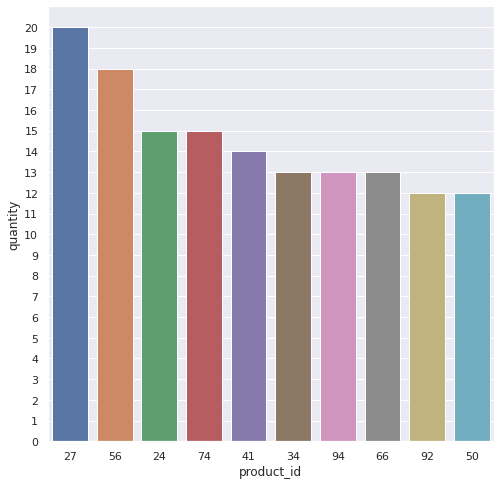

In [12]:
# Найдем топ-10 товаров по числу проданных единиц за всё время и построим барплот
sns.set(rc={"figure.figsize": ( 8 , 8 )}) # укажем нужный размер графика
plt.yticks([i for i in range(21)]) # укажем нужное количество значений на оси y
top_goods = full_data.groupby('product_id', as_index=False) \
    .agg({'quantity': 'sum'}) \
    .sort_values('quantity', ascending=False) \
    .head(10)
ax = sns.barplot(x='product_id', y='quantity', data=top_goods, order=top_goods.product_id) # order - сортировка

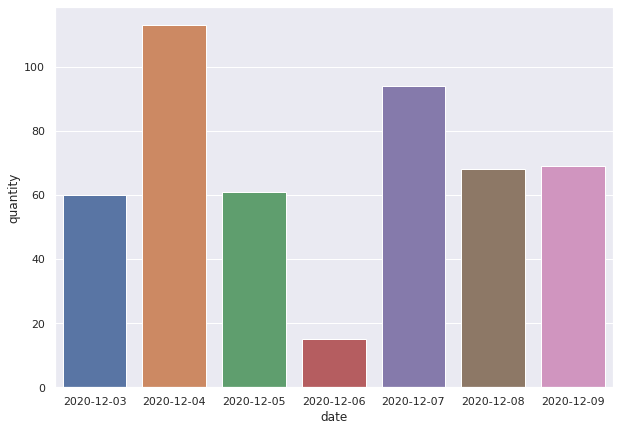

In [13]:
# построим график продаж по дням
sns.set(rc={"figure.figsize": ( 10 , 7 )}) 
sales_by_date = full_data.groupby('date', as_index=False) \
    .agg({'quantity': 'sum'})
ax = sns.barplot(x='date', y='quantity', data=sales_by_date)

In [14]:
# Определим пользователей, осуществивших повторные покупки (покупку одного и того же товара в РАЗНЫЕ дни)
double_buyers = full_data.drop_duplicates(subset=['date']) \
    .groupby('name') \
    .agg({'product_id': 'count'}) \
    .query('product_id > 1')
double_buyers

,product_id
name,
Alexey_Smirnov,2
Kirill_Fedorov,2
